In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#load dataset

In [2]:
df=pd.read_csv("/content/Pokemon_dot.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
#shape of dataset
df.shape

(800, 12)

In [4]:
#drop the # column
df.drop("#",axis=1,inplace=True)

In [18]:
# Drop non-numeric column 'Name'
df = df.drop(columns=['Name'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Type 1      800 non-null    int64
 1   Type 2      800 non-null    int64
 2   Total       800 non-null    int64
 3   HP          800 non-null    int64
 4   Attack      800 non-null    int64
 5   Defense     800 non-null    int64
 6   Sp. Atk     800 non-null    int64
 7   Sp. Def     800 non-null    int64
 8   Speed       800 non-null    int64
 9   Generation  800 non-null    int64
 10  Legendary   800 non-null    bool 
dtypes: bool(1), int64(10)
memory usage: 63.4 KB


In [6]:
#check the null values
df.isna().sum()

,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


In [7]:
#replce null value filled the none
df.fillna("none",inplace=True)

In [8]:
#check the null  values
df.isnull().sum().any()

False

In [9]:
#check the duplicated dataset
df.duplicated().sum()

0

In [10]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#convert the categorica data to numerical

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Encode categorical features
le = LabelEncoder()
df['Type 1'] = le.fit_transform(df['Type 1'])
df['Type 2'] = le.fit_transform(df['Type 2'])

In [17]:
df['Legendary'].value_counts()

,count
Legendary,
False,735
True,65


In [23]:
#replace the legendary column
df['Legendary']=df['Legendary'].replace({True:1,False:0})

In [24]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,0
1,9,13,405,60,62,63,80,80,60,1,0
2,9,13,525,80,82,83,100,100,80,1,0
3,9,13,625,80,100,123,122,120,80,1,0
4,6,18,309,39,52,43,60,50,65,1,0


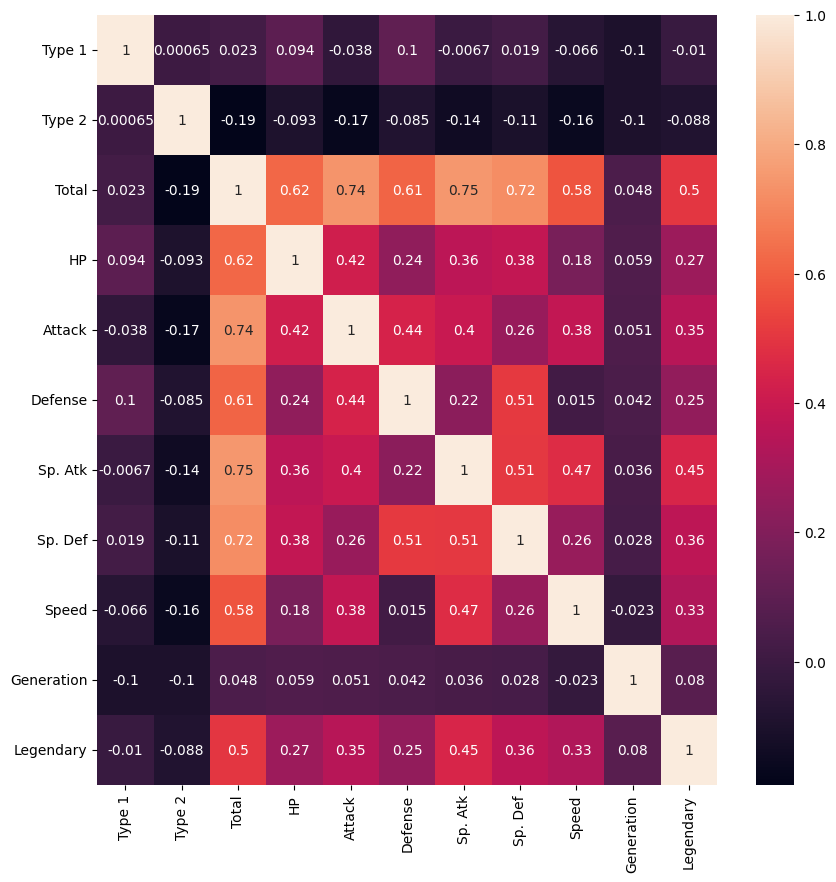

In [26]:
#correlation between relation
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

#split the dataset in X,y

In [27]:
# Split data into features and target
X = df.drop(columns=['Legendary'])
y = df['Legendary']

In [28]:
#split the datset in train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [33]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



In [34]:
import joblib
joblib.dump(model,"pokemon.pkl")

['pokemon.pkl']